# **Neural network regression with tensorflow**

In [1]:
# import os
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [2]:
# TO BE CHECKED
# %load_ext tensorboard

In [3]:
import tensorflow as tf

2024-07-13 23:09:16.864091: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-13 23:09:16.891669: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-13 23:09:16.917655: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-13 23:09:16.917705: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-13 23:09:16.941773: I tensorflow/core/platform/cpu_feature_gua

In [4]:
print(tf.__version__)

2.16.2


In [5]:
import numpy as np
import matplotlib.pyplot as plt

## **Generating datasets**

In [6]:
# Create features
X = np.arange(start = -7, stop = 15, step = 3, dtype = 'float32')

In [7]:
X

array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)

In [8]:
# Create labels
y = np.arange(start = 3, stop = 25, step = 3, dtype = 'float32')

In [9]:
y

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)

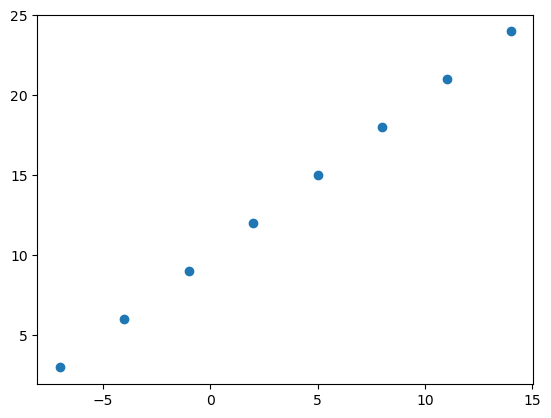

In [10]:
plt.scatter(X, y)
plt.show()

In [11]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [12]:
X = tf.constant(X)

2024-07-13 23:09:19.397559: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-13 23:09:19.532320: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-13 23:09:19.532369: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-13 23:09:19.536663: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-13 23:09:19.536739: I external/local_xla/xla/stream_executor

In [13]:
y = tf.constant(y)

## **Creating a model**

In [14]:
tf.random.set_seed(42)

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

In [16]:
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

In [17]:
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step - loss: 13.8871 - mae: 13.8871
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 13.7546 - mae: 13.7546
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 13.6221 - mae: 13.6221
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 13.4896 - mae: 13.4896
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 13.3571 - mae: 13.3571

I0000 00:00:1720904960.359786  248102 service.cc:145] XLA service 0x7f57a8005fe0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1720904960.359862  248102 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-07-13 23:09:20.368799: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-07-13 23:09:20.414591: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
I0000 00:00:1720904960.489079  248102 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 13.3571 - mae: 13.3571


In [18]:
y_pred = model.predict(tf.expand_dims([17], axis = -1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


In [19]:
y_pred

array([[1.1447088]], dtype=float32)

## **Improving the model**

#### **Inrease number of epochs**

In [20]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

In [21]:
model2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

In [22]:
model2.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - loss: 11.7407 - mae: 11.7407
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11.6082 - mae: 11.6082
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11.4757 - mae: 11.4757
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11.3432 - mae: 11.3432
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11.2107 - mae: 11.2107
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 11.0782 - mae: 11.0782
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 10.9457 - mae: 10.9457
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 10.8132 - mae: 10.8132
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 10.6807 - mae: 10.6807
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 10.5482 - mae: 10.5482
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 10.4157 - mae: 10.4157
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 10.2832 - mae: 10.2832
Epoch 13/100
1/1 ━━━━━━━

In [23]:
y_pred2 = model2.predict(tf.expand_dims([17], axis = -1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [24]:
y_pred2

array([[29.609985]], dtype=float32)

#### **Add extra hidden layer**

In [25]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

In [26]:
model3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

In [27]:
model3.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - loss: 13.2901 - mae: 13.2901
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 12.6606 - mae: 12.6606
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 12.0240 - mae: 12.0240
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 11.3795 - mae: 11.3795
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 10.7253 - mae: 10.7253
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 10.0616 - mae: 10.0616
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.3797 - mae: 9.3797
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.6591 - mae: 8.6591
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.9083 - mae: 7.9083
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.1302 - mae: 7.1302
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.3038 - mae: 6.3038
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.4190 - mae: 5.4190
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━

In [28]:
y_pred3 = model3.predict(tf.expand_dims([17], axis = -1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


In [29]:
y_pred3

array([[32.315666]], dtype=float32)

#### **Some more changes**

1. Decreasing numbers of neurons in the first hidden layer

In [30]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1)
])

In [31]:
model3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

In [32]:
model3.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - loss: 13.3286 - mae: 13.3286
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 12.8338 - mae: 12.8338
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 12.3368 - mae: 12.3368
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 11.8350 - mae: 11.8350
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 11.3259 - mae: 11.3259
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 10.8068 - mae: 10.8068
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 10.2750 - mae: 10.2750
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 9.7279 - mae: 9.7279
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 9.1625 - mae: 9.1625
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.5761 - mae: 8.5761
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.9656 - mae: 7.9656
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.3279 - mae: 7.3279
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━

In [33]:
y_pred3 = model3.predict(tf.expand_dims([17], axis = -1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


In [34]:
y_pred3

array([[30.201857]], dtype=float32)

2. Change optimizer function to Adam with default arguments

In [35]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1)
])

In [36]:
model3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae']
)

In [37]:
model3.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step - loss: 14.5639 - mae: 14.5639
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 14.4956 - mae: 14.4956
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 14.4273 - mae: 14.4273
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 14.3592 - mae: 14.3592
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 14.2911 - mae: 14.2911
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 14.2232 - mae: 14.2232
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 14.1553 - mae: 14.1553
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 14.0874 - mae: 14.0874
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 14.0197 - mae: 14.0197
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 13.9520 - mae: 13.9520
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 13.8843 - mae: 13.8843
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 13.8168 - mae: 13.8168
Epoch 13/100
1/1 ━━━━━━━

In [38]:
y_pred3 = model3.predict(tf.expand_dims([17], axis = -1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


In [39]:
y_pred

array([[1.1447088]], dtype=float32)

3. Set learning rate to 0.01 for Adam optimizer

In [40]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1)
])

In [41]:
model3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
    metrics = ['mae']
)

In [42]:
model3.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ -1s -1344959us/step - loss: 13.7393 - mae: 13.7393
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 13.0618 - mae: 13.0618
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 12.3873 - mae: 12.3873
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 11.7143 - mae: 11.7143
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 11.0402 - mae: 11.0402
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 10.3605 - mae: 10.3605
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9.6707 - mae: 9.6707
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.9667 - mae: 8.9667
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.2452 - mae: 8.2452
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 7.5030 - mae: 7.5030
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 6.7847 - mae: 6.7847
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 6.7518 - mae: 6.7518
Epoch 13/100
1/1 ━━━━━━━━━━━━━

In [43]:
y_pred3 = model3.predict(tf.expand_dims([17], axis = -1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [44]:
y_pred3

array([[26.342943]], dtype=float32)

## **Evaluating a model**

In [45]:
X2 = tf.range(-100, 100, 4)

In [46]:
X2

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [47]:
y2 = X2 + 10

In [48]:
y2

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

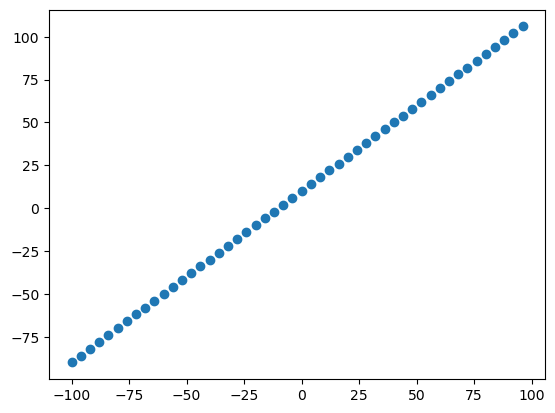

In [49]:
plt.scatter(X2, y2)
plt.show()

In [50]:
X2_train = X2[:40]

In [51]:
y2_train = y2[:40]

In [52]:
X2_test = X2[40:]

In [53]:
y2_test = y2[40:]

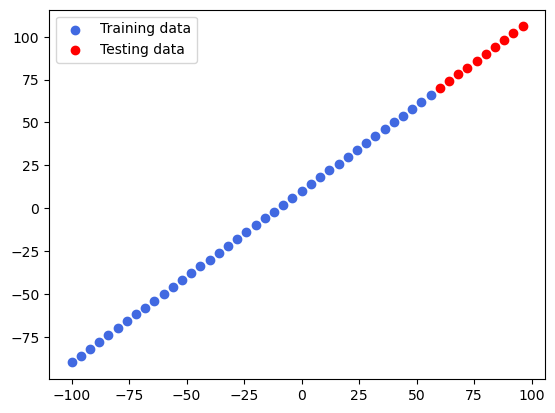

In [54]:
plt.scatter(X2_train, y2_train, c = 'royalblue', label = 'Training data')
plt.scatter(X2_test, y2_test, c = 'red', label = 'Testing data')
plt.legend()
plt.show()

In [55]:
model4 = tf.keras.models.Sequential([
    # tf.keras.layers.Dense(1, input_shape = [1])
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1)
])

In [56]:
model4.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [57]:
model4.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
    metrics = ['mae']
)

In [58]:
model4.fit(tf.expand_dims(X2_train, axis = -1), y2_train, epochs = 100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - loss: 44.6839 - mae: 44.6839
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 32.4843 - mae: 32.4843 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 20.5786 - mae: 20.5786 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.8747 - mae: 9.8747   
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10.9403 - mae: 10.9403 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13.2921 - mae: 13.2921 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13.5123 - mae: 13.5123 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.2613 - mae: 12.2613 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.0253 - mae: 10.0253 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.4151 - mae: 7.4151 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.1904 - mae: 9.1904 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.0171 - mae: 10.0171 
Epoch 13/100
2/2 ━━━━━━━━━━━

In [59]:
model4.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 50)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 455 (1.78 KB)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 304 (1.19 KB)

In [60]:
y2_pred = model4.predict(tf.expand_dims(X2_test, axis = -1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


In [61]:
y2_test, y2_pred

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>,
 array([[ 70.780266],
        [ 74.83358 ],
        [ 78.886894],
        [ 82.9402  ],
        [ 86.993515],
        [ 91.04683 ],
        [ 95.10014 ],
        [ 99.15345 ],
        [103.206764],
        [107.26008 ]], dtype=float32))

In [62]:
from tensorflow.keras.utils import plot_model

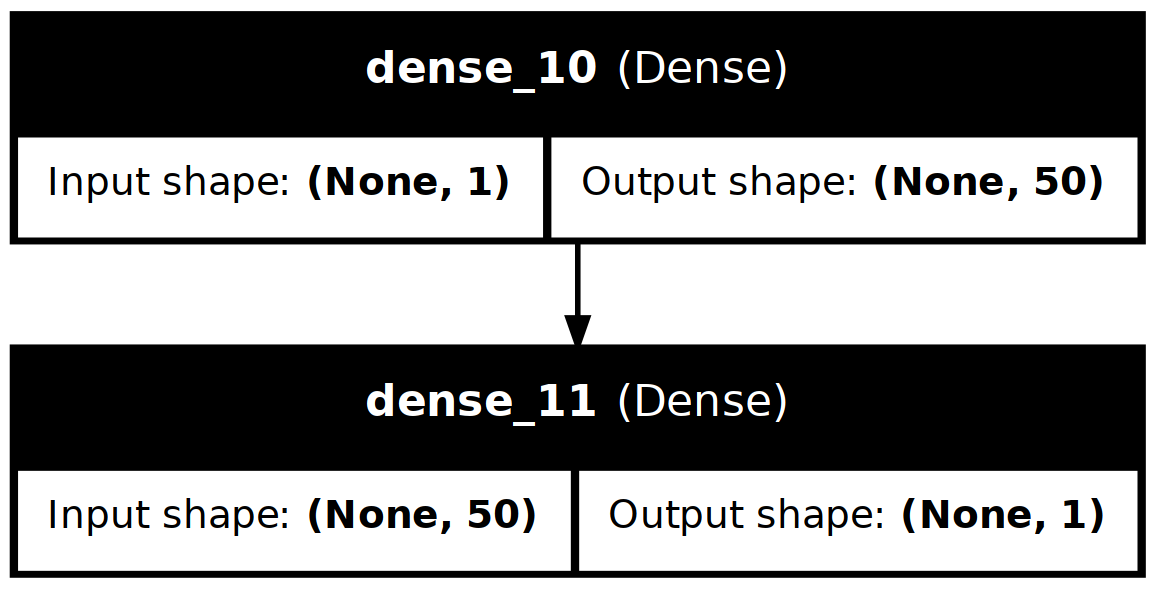

In [63]:
plot_model(model4, show_shapes = True, show_layer_names = True, expand_nested = True, rankdir = 'TB')

In [64]:
def plot_predictions(train_data, train_labels, test_data, test_labels, predictions):
    plt.figure(figsize = (10, 6))
    plt.style.use('seaborn-v0_8')
    # Scatter the training data
    plt.scatter(x = train_data, y = train_labels, label = 'Training data')
    # Scatter the testing data
    plt.scatter(x = test_data, y = test_labels, label = 'Testing data', c = 'red')
    # Scatter the predictions
    plt.scatter(x = test_labels, y = predictions, label = 'Predictions', c = 'green')
    plt.xlim(-120, 120)
    plt.ylim(-120, 120)
    plt.legend()
    plt.show()

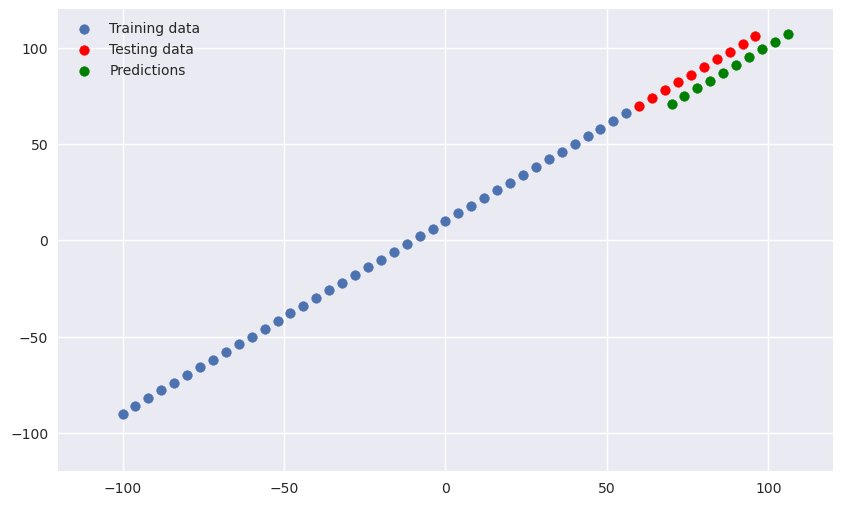

In [65]:
plot_predictions(X2_train, y2_train, X2_test, y2_test, y2_pred)

In [66]:
model4.evaluate(X2_test, y2_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 1.0202 - mae: 1.0202


[1.020172119140625, 1.020172119140625]

In [67]:
def get_metrics(y_true, y_pred):
    """
    Calculates and returns mae, mse and huber metrics. y_pred needs to be squeezed!
    """
    y_pred_sq = tf.squeeze(y_pred)
    mae = tf.keras.metrics.mae(y_true, y_pred_sq).numpy()
    mse = tf.keras.metrics.mse(y_true, y_pred_sq).numpy()
    huber = tf.keras.metrics.huber(y_true, y_pred_sq).numpy()
    return mae, mse, huber

def print_metrics(mae, mse, huber):
    """
    Return metrics in a formatted string
    """
    return f'MAE: {mae:.4f}; MSE: {mse:.4f}; Huber: {huber:.4f}'
    

In [68]:
mae, mse, huber = get_metrics(y2_test, tf.squeeze(y2_pred))

In [69]:
print(f'Model metrics: MAE: {mae:.4f}; MSE: {mse:.4f}; Huber: {huber:.4f}')

Model metrics: MAE: 1.0202; MSE: 1.0642; Huber: 0.5248


## **Some experiments**

#### **Model 1**

In [70]:
# tf.random.set_seed(42) - this code is for versions of tf below 2.7
tf.keras.utils.set_random_seed(42)

# Create a model
exp_1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile a model
exp_1.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

# Fit the model
exp_1.fit(tf.expand_dims(X2_train, axis = -1), y2_train, epochs = 100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 14.7410 - mae: 14.7410
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.8267 - mae: 8.8267 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.2955 - mae: 10.2955 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12.0810 - mae: 12.0810 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.6305 - mae: 12.6305 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.1686 - mae: 8.1686 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.7134 - mae: 8.7134 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.5802 - mae: 8.5802 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.3468 - mae: 8.3468 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.0923 - mae: 9.0923 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.1614 - mae: 8.1614 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.8314 - mae: 8.8314 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [71]:
exp_1_pred = exp_1.predict(X2_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


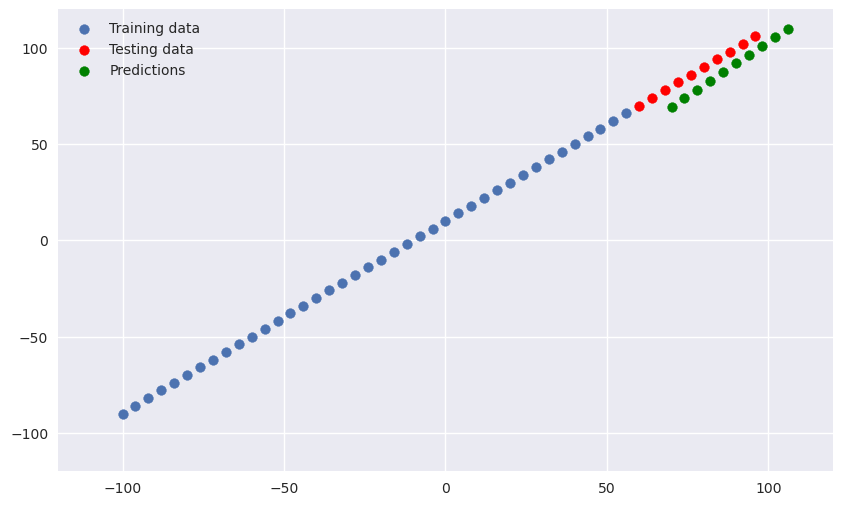

In [72]:
plot_predictions(X2_train, y2_train, X2_test, y2_test, exp_1_pred)

In [73]:
exp_1_mae, exp_1_mse, exp_1_huber = get_metrics(y2_test, exp_1_pred)
exp_1_results = print_metrics(exp_1_mae, exp_1_mse, exp_1_huber)
exp_1_results

'MAE: 1.8126; MSE: 4.9014; Huber: 1.3723'

#### **Model 2**

In [74]:
tf.keras.utils.set_random_seed(42)

# Create a model
exp_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile a model
exp_2.compile(
    loss = tf.keras.losses.mae,
    # If I use SGD optimizer, model performs very poor!
    optimizer = tf.keras.optimizers.SGD(),
    # If I switch to a Adam optimizer, model performs excellent!
    # optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
    metrics = ['mse']
)

# Fit a model
exp_2.fit(tf.expand_dims(X2_train, axis = -1), y2_train, epochs = 100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 33.3860 - mse: 1557.2288
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 26.8476 - mse: 989.7845 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23.9432 - mse: 777.9082 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 19.9571 - mse: 538.7654 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 17.9614 - mse: 437.9494 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17.1237 - mse: 397.2108 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 11.7945 - mse: 223.3665 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14.5240 - mse: 294.3103 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15.9587 - mse: 343.1346 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11.9974 - mse: 218.1443 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14.9941 - mse: 308.7084 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11.0583 - mse: 192.3879 
Epoch 13/100

In [75]:
exp_2_pred = exp_2.predict(X2_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


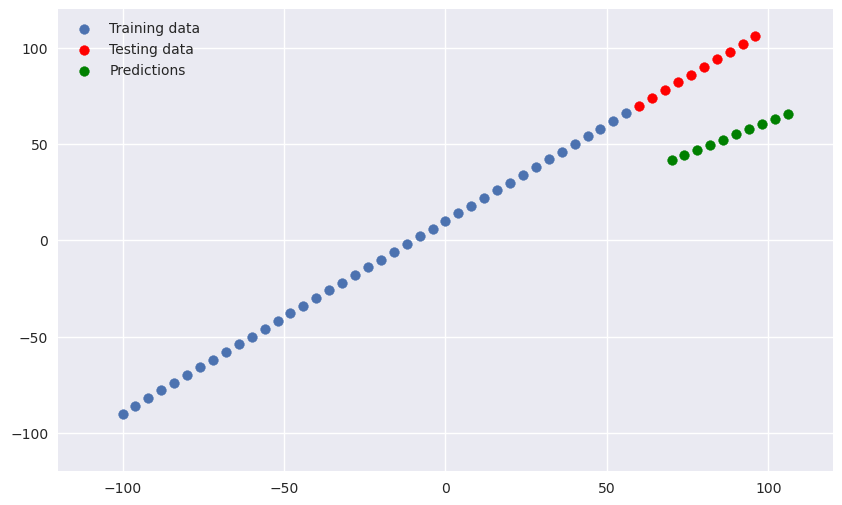

In [76]:
plot_predictions(X2_train, y2_train, X2_test, y2_test, exp_2_pred)

In [77]:
exp_2_mae, exp_2_mse, exp_2_huber = get_metrics(y2_test, exp_2_pred)
exp_2_results = print_metrics(exp_2_mae, exp_2_mse, exp_2_huber)
exp_2_results

'MAE: 34.3595; MSE: 1195.2330; Huber: 33.8595'

#### **Model 3**

In [78]:
tf.keras.utils.set_random_seed(42)

# Create a model
exp_3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10),
    # Tried this instead of 500 epochs - gives better performance
    # tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(1),
])

# Compile a model
exp_3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

# Fit a model
exp_3.fit(tf.expand_dims(X2_train, axis = -1), y2_train, epochs = 500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 33.3860 - mae: 33.3860
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 26.8476 - mae: 26.8476 
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 23.9432 - mae: 23.9432 
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19.9571 - mae: 19.9571 
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17.9614 - mae: 17.9614 
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 17.1237 - mae: 17.1237 
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.7945 - mae: 11.7945 
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.5240 - mae: 14.5240 
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 15.9587 - mae: 15.9587 
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11.9974 - mae: 11.9974 
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14.9941 - mae: 14.9941 
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.0583 - mae: 11.0583 
Epoch 13/500
2/2 ━━━━━━━━

In [79]:
exp_3_pred = exp_3.predict(X2_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


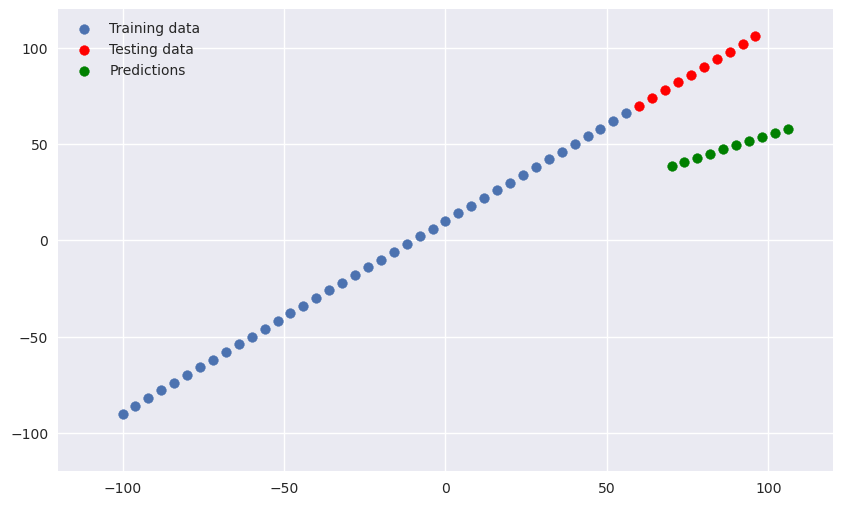

In [80]:
plot_predictions(X2_train, y2_train, X2_test, y2_test, exp_3_pred)

In [81]:
exp_3_mae, exp_3_mse, exp_3_huber = get_metrics(y2_test, exp_3_pred)
exp_3_results = print_metrics(exp_3_mae, exp_3_mse, exp_3_huber)
exp_3_results

'MAE: 39.7558; MSE: 1608.5271; Huber: 39.2558'

#### **Model 4**

In [82]:
tf.keras.utils.set_random_seed(42)

# Create a model
exp_4 = tf.keras.models.Sequential([    
    tf.keras.layers.Dense(10),
    # Plain dense layer beats layer with relu activation
    # tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

# Compile a model
exp_4.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
    metrics = ['mae']
)

# Fit a model
exp_4.fit(tf.expand_dims(X2_train, axis = -1), y2_train, epochs = 100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - loss: 31.5584 - mae: 31.5584
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 25.1694 - mae: 25.1694 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 19.1168 - mae: 19.1168 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13.3713 - mae: 13.3713 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.7865 - mae: 8.7865 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.8815 - mae: 8.8815 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.5866 - mae: 10.5866 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.3088 - mae: 11.3088 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.2952 - mae: 11.2952 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10.7292 - mae: 10.7292 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.7484 - mae: 9.7484 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.4563 - mae: 8.4563 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━

In [83]:
exp_4.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95 (384.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 64 (260.00 B)

In [84]:
exp_4_pred = exp_4.predict(X2_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


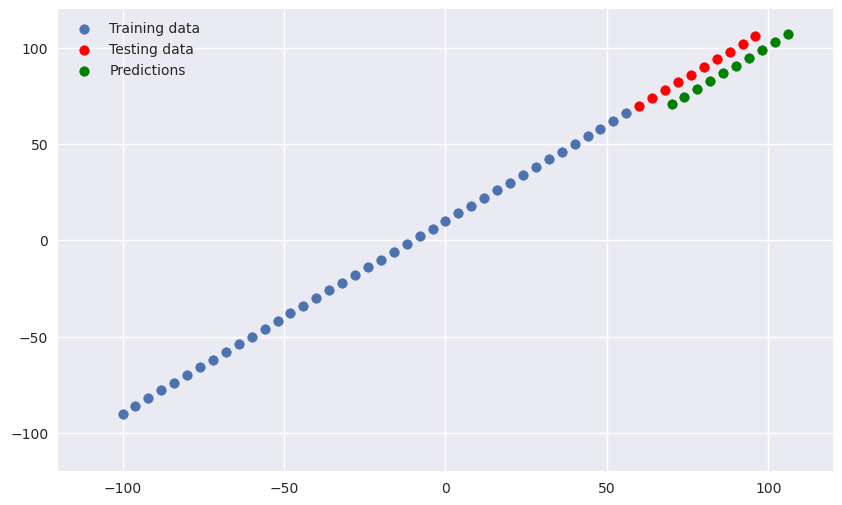

In [85]:
plot_predictions(X2_train, y2_train, X2_test, y2_test, exp_4_pred)

In [86]:
exp_4_mae, exp_4_mse, exp_4_huber = get_metrics(y2_test, exp_4_pred)
exp_4_results = print_metrics(exp_4_mae, exp_4_mse, exp_4_huber)
exp_4_results

'MAE: 0.7236; MSE: 0.5368; Huber: 0.2684'

## **Comparing the results**

In [87]:
import pandas as pd

In [88]:
modeling_results = [
    ['model 1', exp_1_mae, exp_1_mse, exp_1_huber],
    ['model 2', exp_2_mae, exp_2_mse, exp_2_huber],
    ['model 3', exp_3_mae, exp_3_mse, exp_3_huber],
    ['model 4', exp_4_mae, exp_4_mse, exp_4_huber],
]

In [89]:
comparison = pd.DataFrame(data = modeling_results, columns = ['Model name', 'MAE', 'MSE', 'Huber'])

In [90]:
comparison.set_index('Model name')

,MAE,MSE,Huber
Model name,,,
model 1,1.812563,4.901366,1.372345
model 2,34.359467,1195.233032,33.859467
model 3,39.755806,1608.527100,39.255806
model 4,0.723608,0.536801,0.268400


In [91]:
pd.DataFrame.sort_values(comparison, by = ['MAE', 'MSE', 'Huber'], inplace = True)

In [92]:
comparison

,Model name,MAE,MSE,Huber
3,model 4,0.723608,0.536801,0.268400
0,model 1,1.812563,4.901366,1.372345
1,model 2,34.359467,1195.233032,33.859467
2,model 3,39.755806,1608.527100,39.255806


In [93]:
model4.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 50)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 455 (1.78 KB)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 304 (1.19 KB)

## **Saving a model**

#### **Save as SavedModel**

**Note:** This file format is not suppoted anymore in the newer versions of keras

In [94]:
exp_4.export(filepath = 'saved_model/exp_4-1')

INFO:tensorflow:Assets written to: saved_model/exp_4-1/assets


INFO:tensorflow:Assets written to: saved_model/exp_4-1/assets


Saved artifact at 'saved_model/exp_4-1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor_27')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  140015135619216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140015135620176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140015135618064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140015135620752: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [95]:
# This code works with wrapt package version 1.15.
# Tensorflow comes with wrapt version 1.16 and the code doesn't work
# tf.saved_model.save(exp_4, export_dir = 'saved_model/exp_4-2')

#### **Saving as a .hdf5**

In [96]:
tf.keras.models.save_model(exp_4, 'model_4-1.h5')

In [97]:
exp_4.save('model_4-2.h5')

#### **Saving as a .keras**

In [98]:
tf.keras.models.save_model(exp_4, 'model_4-1.keras')

In [99]:
exp_4.save('model_4-2.keras')

## **Loading a model**

#### **SavedModel model**

Since this format is unsupported, the following error occurs:

`
ValueError: File format not supported: filepath=saved_model/exp_4-1. Keras 3 only supports V3 `.keras` files and legacy H5 format files (`.h5` extension). Note that the legacy SavedModel format is not supported by `load_model()` in Keras 3. In order to reload a TensorFlow SavedModel as an inference-only layer in Keras 3, use `keras.layers.TFSMLayer(saved_model/exp_4-1, call_endpoint='serving_default')` (note that your `call_endpoint` might have a different name).
`

In [100]:
# model_saved_model = tf.keras.models.load_model('saved_model/exp_4-1')

#### **H5 mmodel**

In [101]:
h5_saved = tf.keras.models.load_model('model_4-1.h5')

In [102]:
h5_saved.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [103]:
h5_saved_pred = h5_saved.predict(X2_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


In [104]:
exp_4_pred, h5_saved_pred

(array([[ 70.54367 ],
        [ 74.58365 ],
        [ 78.62364 ],
        [ 82.66363 ],
        [ 86.70361 ],
        [ 90.7436  ],
        [ 94.783585],
        [ 98.823586],
        [102.86356 ],
        [106.90355 ]], dtype=float32),
 array([[ 70.54367 ],
        [ 74.58365 ],
        [ 78.62364 ],
        [ 82.66363 ],
        [ 86.70361 ],
        [ 90.7436  ],
        [ 94.783585],
        [ 98.823586],
        [102.86356 ],
        [106.90355 ]], dtype=float32))

In [105]:
exp_4_pred == h5_saved_pred

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [106]:
pd.DataFrame([exp_4_pred.squeeze(), h5_saved_pred.squeeze()])

,0,1,2,3,4,5,6,7,8,9
0,70.543671,74.583649,78.623642,82.663628,86.703613,90.743599,94.783585,98.823586,102.863564,106.903549
1,70.543671,74.583649,78.623642,82.663628,86.703613,90.743599,94.783585,98.823586,102.863564,106.903549


#### **Keras model**

In [107]:
keras_saved = tf.keras.models.load_model('model_4-1.keras')

/home/oggy/miniconda3/envs/tf-env/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [108]:
keras_saved.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64 (260.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 33 (136.00 B)

In [109]:
keras_saved_pred = keras_saved.predict(X2_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [110]:
exp_4_pred, keras_saved_pred

(array([[ 70.54367 ],
        [ 74.58365 ],
        [ 78.62364 ],
        [ 82.66363 ],
        [ 86.70361 ],
        [ 90.7436  ],
        [ 94.783585],
        [ 98.823586],
        [102.86356 ],
        [106.90355 ]], dtype=float32),
 array([[ 70.54367 ],
        [ 74.58365 ],
        [ 78.62364 ],
        [ 82.66363 ],
        [ 86.70361 ],
        [ 90.7436  ],
        [ 94.783585],
        [ 98.823586],
        [102.86356 ],
        [106.90355 ]], dtype=float32))

In [111]:
exp_4_pred == keras_saved_pred

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [112]:
pd.DataFrame([exp_4_pred.squeeze(), keras_saved_pred.squeeze()])

,0,1,2,3,4,5,6,7,8,9
0,70.543671,74.583649,78.623642,82.663628,86.703613,90.743599,94.783585,98.823586,102.863564,106.903549
1,70.543671,74.583649,78.623642,82.663628,86.703613,90.743599,94.783585,98.823586,102.863564,106.903549


In [113]:
!ls

Regression_with_tensorflow.ipynb  model_4-1.h5	   model_4-2.keras
insurance.csv			  model_4-1.keras  saved_model
model.png			  model_4-2.h5	   test.test


In [114]:
!touch test.test

## **Putting it all together**

In [115]:
insurance = pd.read_csv('insurance.csv')

In [116]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [117]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [118]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### **Data preparation**

In [119]:
# Test with one hot encopding
pd.get_dummies(insurance, drop_first = True, dtype = 'int64')

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [120]:
insurance_one_hot = pd.get_dummies(insurance, dtype = 'int64')

In [121]:
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


#### **Create datasets**

In [122]:
insurance_one_hot = insurance_one_hot.iloc[:, [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 3]]

In [123]:
list(insurance_one_hot.columns)

['age',
 'bmi',
 'children',
 'sex_female',
 'sex_male',
 'smoker_no',
 'smoker_yes',
 'region_northeast',
 'region_northwest',
 'region_southeast',
 'region_southwest',
 'charges']

In [124]:
X_ins = insurance_one_hot.iloc[:, :-1]

In [125]:
y_ins = insurance_one_hot.iloc[:, -1]

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
X_train_ins, X_test_ins, y_train_ins, y_test_ins = train_test_split(X_ins, y_ins, test_size = 0.2, random_state = 42)

In [128]:
len(X), len(X_train_ins), len(X_test_ins)

(8, 1070, 268)

In [129]:
len(y), len(y_train_ins), len(y_test_ins)

(8, 1070, 268)

#### **Build initial model**

In [130]:
tf.keras.utils.set_random_seed(42)

# Create a model
model_ins_1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile a model
model_ins_1.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

# Fit a model
model_ins_1.fit(X_train_ins, y_train_ins, epochs = 100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 10202.5049 - mae: 10202.5049 
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7525.1660 - mae: 7525.1660 
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7311.7993 - mae: 7311.7993 
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7389.6074 - mae: 7389.6074 
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7721.8428 - mae: 7721.8428 
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7628.1733 - mae: 7628.1733 
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - loss: 7575.5903 - mae: 7575.5903
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7669.1479 - mae: 7669.1479 
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7106.8823 - mae: 7106.8823 
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - loss: 7622.1362 - mae: 7622.1362
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - loss: 7586.7715 - mae: 7586.7715
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━

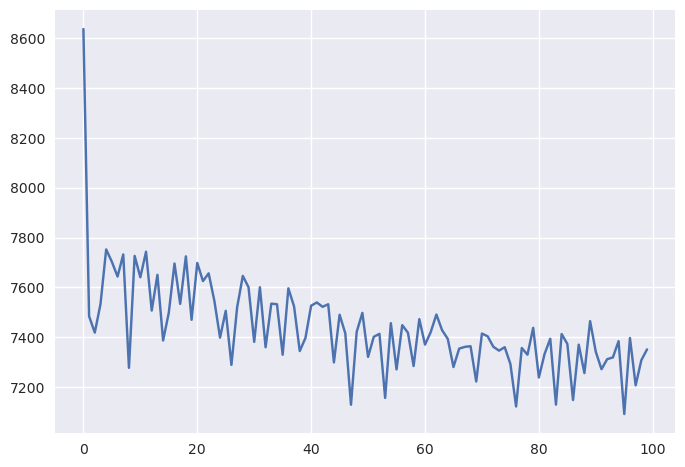

In [131]:
plt.plot(model_ins_1.history.history['mae']);

In [132]:
model_ins_1.evaluate(X_test_ins, y_test_ins)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 6151.6040 - mae: 6151.6040


[6003.412109375, 6003.412109375]

In [133]:
y_test_ins_1_pred = model_ins_1.predict(X_test_ins)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [134]:
len(y_test_ins_1_pred)

268

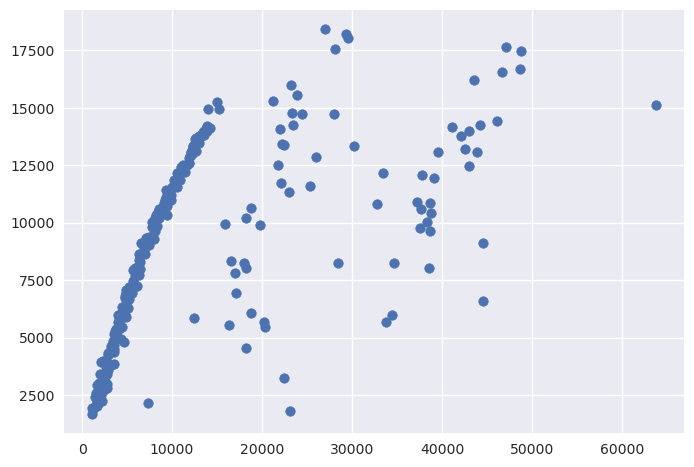

In [135]:
plt.scatter(x = y_test_ins, y = y_test_ins_1_pred);

In [136]:
model_ins_1_mae, model_ins_1_mse, model_ins_1_huber = get_metrics(y_test_ins, y_test_ins_1_pred)

In [137]:
print_metrics(model_ins_1_mae, model_ins_1_mse, model_ins_1_huber)

'MAE: 6003.4121; MSE: 126122096.0000; Huber: 6002.9121'

#### **Model 2**

In [138]:
tf.keras.utils.set_random_seed(42)

model_ins_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

In [139]:
model_ins_2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae']
)

In [140]:
model_ins_2.fit(X_train_ins, y_train_ins, epochs = 100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 13280.7500 - mae: 13280.7500    
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - loss: 13136.8047 - mae: 13136.8047
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - loss: 12842.7705 - mae: 12842.7705
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - loss: 12249.6055 - mae: 12249.6055
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - loss: 11207.9463 - mae: 11207.9463
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - loss: 9775.2646 - mae: 9775.2646 
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - loss: 8342.1201 - mae: 8342.1201
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - loss: 7523.9126 - mae: 7523.9126
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - loss: 7385.0918 - mae: 7385.0918
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - loss: 7358.1240 - mae: 7358.1240
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - loss: 7336.9229 - mae: 7336.9229
Epoch 12/100
34

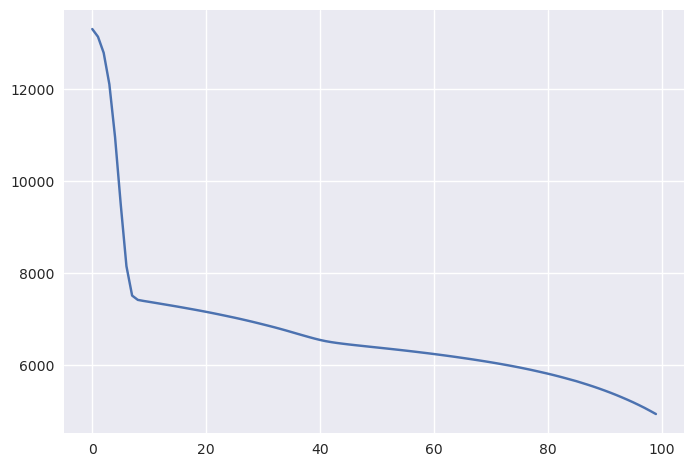

In [141]:
plt.plot(model_ins_2.history.history['mae']);

In [142]:
model_ins_2.evaluate(X_test_ins, y_test_ins)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 4975.7520 - mae: 4975.7520


[4829.640625, 4829.640625]

In [143]:
y_test_ins_2_pred = model_ins_2.predict(X_test_ins)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


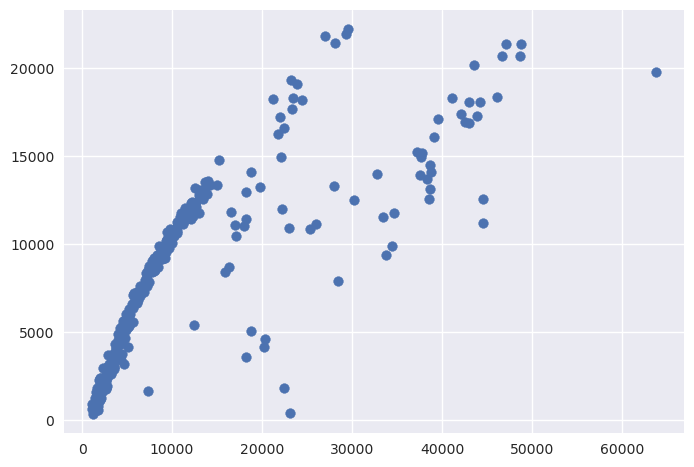

In [144]:
plt.scatter(x = y_test_ins, y = y_test_ins_2_pred);

In [145]:
model_ins_2_mae, model_ins_2_mse, model_ins_2_huber = get_metrics(y_test_ins, y_test_ins_2_pred)

In [146]:
print_metrics(model_ins_2_mae, model_ins_2_mse, model_ins_2_huber)

'MAE: 4829.6406; MSE: 97305728.0000; Huber: 4829.1406'

#### **Model 3**

In [147]:
tf.keras.utils.set_random_seed(42)

model_ins_3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

In [148]:
model_ins_3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
    metrics = ['mae']
)

In [149]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor = 'loss',
    patience = 5
)

In [150]:
history = model_ins_3.fit(
    x = X_train_ins,
    y = y_train_ins,
    epochs = 200,
    callbacks = [early_stop]
)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 12623.2617 - mae: 12623.2617  
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - loss: 7542.4683 - mae: 7542.4683
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - loss: 7231.1646 - mae: 7231.1646
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - loss: 7024.3960 - mae: 7024.3960
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - loss: 6756.8804 - mae: 6756.8804
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - loss: 6428.9224 - mae: 6428.9224
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - loss: 6255.9717 - mae: 6255.9717
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - loss: 6135.7910 - mae: 6135.7910
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5985.8101 - mae: 5985.8101 
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5804.7007 - mae: 5804.7007 
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - loss: 5537.4971 - mae: 5537.4971
Epoch 12/200
34/34 ━━━━━━━━━━━

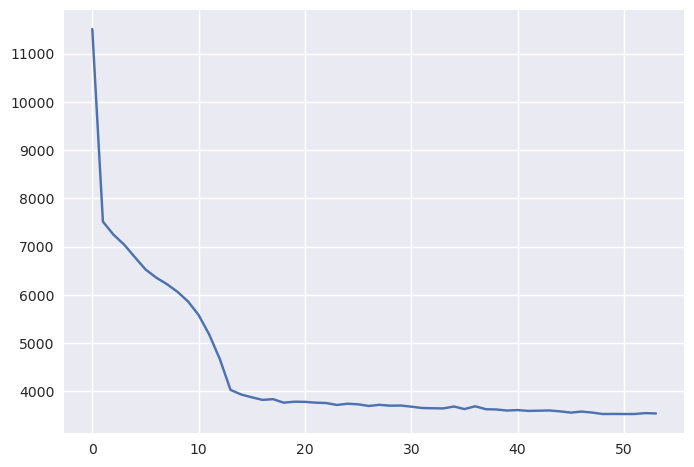

In [151]:
plt.plot(model_ins_3.history.history['mae']);

<Axes: >

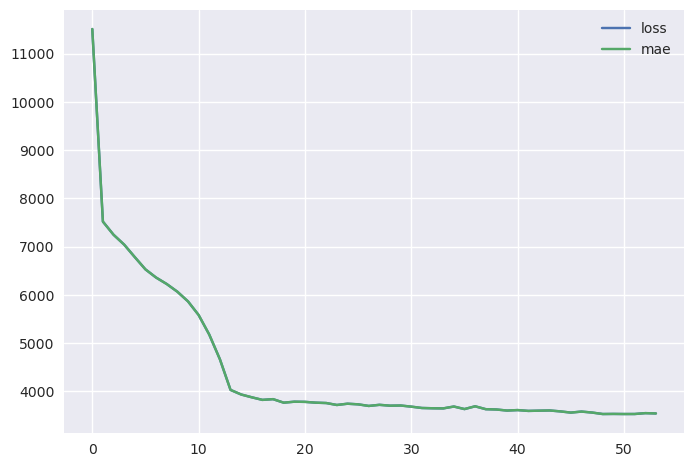

In [152]:
# Alternative way to plot the model history
pd.DataFrame(history.history).plot()

In [153]:
model_ins_3.evaluate(X_test_ins, y_test_ins)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3237.9612 - mae: 3237.9612 


[3179.690673828125, 3179.690673828125]

In [154]:
y_test_ins_3_pred = model_ins_3.predict(X_test_ins)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


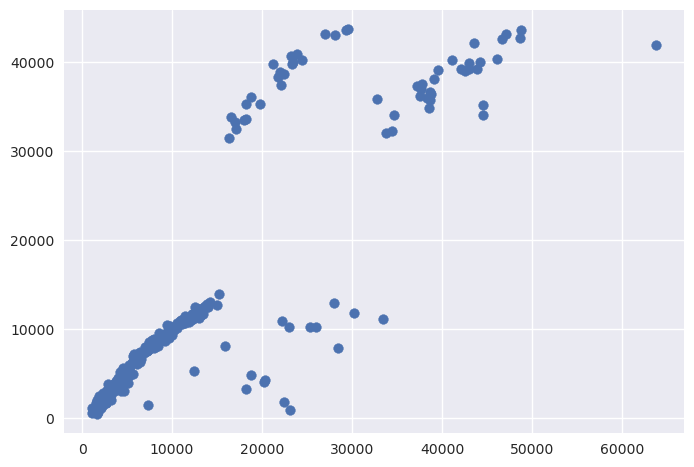

In [155]:
plt.scatter(x = y_test_ins, y = y_test_ins_3_pred);

In [156]:
model_ins_3_mae, model_ins_3_mse, model_ins_3_huber = get_metrics(y_test_ins, y_test_ins_3_pred)

In [157]:
print_metrics(model_ins_3_mae, model_ins_3_mse, model_ins_3_huber)

'MAE: 3179.6909; MSE: 42305788.0000; Huber: 3179.1909'